<a href="https://colab.research.google.com/github/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/blob/main/Module_5/Assignment_5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5
Zachariah Freitas<br>
2022-10-04


Your task is to construct and evaluate multiple data mining models, including k-means, logistic regression, decision trees, random forest classifiers, and bagging classifiers, to segment customers in order to understand their purchase behavior and influence brand loyalty.

Install Libraries

In [1]:
# Connect Colab to Google Drive for Convience.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install Book Libraries
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 2.1 MB/s 


In [189]:
# Import Libraries

# EDA and Preprep
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np

from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

# Classification Model Libraries
from sklearn.linear_model import LogisticRegressionCV # lr or Logistic Regression
from sklearn.ensemble import BaggingClassifier # bc or Bagging Classifier
# from sklearn.ensemble import AdaBoostClassifier # abc or Ada Boost Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # rf or Random Forest Classifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # lda or Linear Discriminant Analysis
# from sklearn.neural_network import MLPClassifier # nn or Neural Nets
# from sklearn.neighbors import KNeighborsClassifier


# Over sampling
# !pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Book Helper Functions
from dmba import plotDecisionTree, gainsChart, liftChart, classificationSummary, regressionSummary
from dmba.metric import AIC_score
# import dmba

# Plotting Libraries
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Inline Plot Formating
%matplotlib inline

In [190]:
# Dataset Source
dataSource = 'https://raw.githubusercontent.com/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/main/Module_5/Assignment_5/BathSoapHousehold.csv'

In [191]:
df = pd.read_csv(dataSource)
df_copy = df.copy()

df_copy.columns = [d.replace(' ', '_').replace('.', '') for d in df_copy.columns]
# df_copy = df_copy.iloc[: , 2:]
# Drop unnecessary columns
# df_copy = df_copy.drop('TARGET_D', axis=1)
df_copy.head()

,Member_id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000,0.000,0.000,0.000,0.0,0.000,0.028,0.0,0.131,0.340
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347,0.027,0.016,0.014,0.0,0.059,0.000,0.0,0.081,0.000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121,0.034,0.011,0.009,0.0,0.000,0.016,0.0,0.562,0.003
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.600,0.000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000,0.000,0.048,0.000,0.0,0.000,0.000,0.0,0.145,0.000


In [192]:
# Demographics that we want to ignore
Demographics = ['SEC', 'FEH' , 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence_Index']

## Question 1
Use k-means clustering to identify clusters of households based on:


### Question 1.1
The variables that describe purchase behavior (including brand loyalty) (10 points)


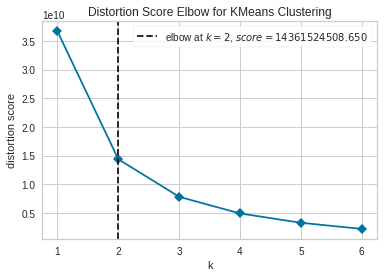

In [193]:
# Purchase behavior (volume, frequency, susceptibility to discounts, and brand loyalty)
Purchase_behavior = ['No_of_Brands', 'Brand_Runs', 'Total_Volume', 'No_of__Trans', 'Value',
                     'Trans_/_Brand_Runs', 'Vol/Tran', 'Avg_Price_', 'Pur_Vol_No_Promo_-_%',
                     'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%', 'Br_Cd_57,_144',
                     'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24', 'Br_Cd_481',
                     'Br_Cd_352', 'Br_Cd_5', 'Others_999'] 

#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(1,7), timings=False)
 
visualizer.fit(df_copy[Purchase_behavior])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [194]:
# Capture data for future analysis
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_copy[Purchase_behavior])

# Add labels to dataset
df_copy['Purchase_behavior_labels'] = kmeans.labels_

---
**Answer:**

The above kmeans cluster exercise on the purchase behavior variables that I’ve selected suggest that there are two main clusters. The variables I’ve selected as purchase behavior variables are listed as follows: 'No_of_Brands', 'Brand_Runs', 'Total_Volume', 'No_of__Trans', 'Value',  'Trans_/_Brand_Runs', 'Vol/Tran', 'Avg_Price_', 'Pur_Vol_No_Promo_-_%',  'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%', 'Br_Cd_57,_144', 'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24', 'Br_Cd_481', 'Br_Cd_352', 'Br_Cd_5', 'Others_999'.

--- 
<br>

### Question 1.2
The variables that describe the basis for purchase (10 points)

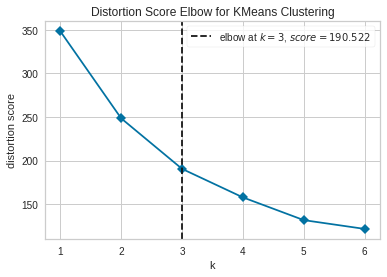

In [195]:
# Basis of purchase (price, selling proposition)
Basis_of_purchase = ['Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 
                       'PropCat_5', 'PropCat_6', 'PropCat_7','PropCat_8',
                       'PropCat_9', 'PropCat_10', 'PropCat_11', 'PropCat_12',
                       'PropCat_13','PropCat_14','PropCat_15']  
#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(1,7), timings=False)
 
visualizer.fit(df_copy[Basis_of_purchase])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [196]:
# Capture data for future analysis
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_copy[Basis_of_purchase])

# Add labels to dataset
df_copy['Basis_of_Purchase_labels'] = kmeans.labels_

---
**Answer:**

The above kmeans cluster exercise on the basis of purchase behavior variables that I’ve selected, suggest that there are three main clusters. The variables I’ve selected as the basis of purchase behavior variables are listed as follows: 'Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 'PropCat_5', 'PropCat_6', 'PropCat_7','PropCat_8', 'PropCat_9', 'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13','PropCat_14','PropCat_15'.


--- 
<br>

### Question 1.3
The variables that describe both purchase behavior and basis of purchase
(14 points)

**Note 1:** How should k be chosen? Think about how the clusters would be used. It is likely that the marketing efforts would support two to five different promotional approaches.

**Note 2:** How should the percentages of total purchases by various brands be treated? Isn’t a customer who buys all brand A just as loyal as a customer who buys all brand B? What will be the effect on any distance measure of using the brand share variables as is? Consider using a single derived variable.


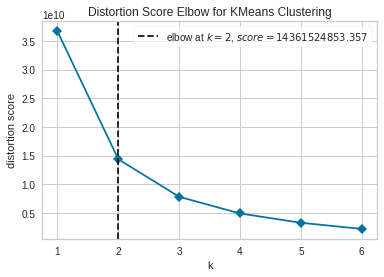

In [197]:
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(1,7), timings=False)
 
visualizer.fit(df_copy[Purchase_behavior + Basis_of_purchase])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [198]:
# Capture data for future analysis
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_copy[Purchase_behavior + Basis_of_purchase])

# Add labels to dataset
df_copy['Basis_and_purchase_behavior_labels'] = kmeans.labels_

Try consolidateing 9 brand loyalty measure to one.

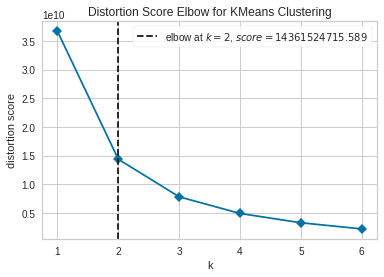

In [199]:
# Create a variable that combines individual loyalty to one brand to overall loyalty to any brand.
df_copy['max_br'] = df_copy[['Br_Cd_57,_144','Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24', 'Br_Cd_481','Br_Cd_352', 'Br_Cd_5', 'Others_999']].max(axis=1)

Purchase_behavior_max = ['No_of_Brands', 'Brand_Runs', 'Total_Volume', 'No_of__Trans', 'Value',
                         'Trans_/_Brand_Runs', 'Vol/Tran', 'Avg_Price_', 'Pur_Vol_No_Promo_-_%',
                         'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%', 'max_br'] 
#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(1,7), timings=False)


x = df_copy[Purchase_behavior_max ]
 
visualizer.fit(df_copy[Purchase_behavior_max + Basis_of_purchase])         # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

---
**Answer:**

When I run the kmeans exercise on both purchase behavior and basis of purchase variables I get two clusters. K selection is done using the elbow method. This method calculates the sum of squared distances between each observation and its closest centroid. This is also know as the distortion. The bend in the distortion curve is known as an elbow and suggest that we are not getting much more incremental improvement for an additional cluster group.

Looking at brand loyalty by each product, we could decide to just look at loyalty to any product. We could create a new variable that consolidates the nine brand loyalty variables by just taking the max of the first eight variables. A value that is higher suggest that the customer is more brand loyal. When I create this variable and rerun our cluster analysis I still only find two main clusters. So I’m not sure this variable adds much value to our analysis.

--- 
<br>

## Question 2
Select what you think is the best segmentation and comment on the characteristics (demographic, brand loyalty, and basis for purchase) of these clusters. (This information would be used to guide the development of advertising and promotional campaigns.)(14 points)


In [200]:
# Cluster Comparison by Demographic Variables

bygroup_treatment = df_copy.groupby(['Purchase_behavior_labels'])
print('\nPurchase Behavior Clusters by Demographic Variables:\n')
print(bygroup_treatment[Demographics].agg([np.mean]).T)

bygroup_treatment = df_copy.groupby(['Basis_of_Purchase_labels'])
print('\nBasis of Purchase Clusters by Demographic Variables:\n')
print(bygroup_treatment[Demographics].agg([np.mean]).T)

bygroup_treatment = df_copy.groupby(['Basis_and_purchase_behavior_labels'])
print('\nPurchase Behavior and Basis of Purchase Clusters by Demographic Variables:\n')
print(bygroup_treatment[Demographics].agg([np.mean]).T)


Purchase Behavior Clusters by Demographic Variables:

Purchase_behavior_labels       0       1
SEC             mean       2.382   2.875
FEH             mean       1.884   2.569
MT              mean       7.689   9.729
SEX             mean       1.675   1.938
AGE             mean       3.167   3.361
EDU             mean       4.094   3.882
HS              mean       3.662   5.868
CHILD           mean       3.336   2.910
CS              mean       0.901   1.028
Affluence_Index mean      16.732  17.931

Basis of Purchase Clusters by Demographic Variables:

Basis_of_Purchase_labels       0      1       2
SEC             mean       1.829  3.329   2.587
FEH             mean       1.822  2.127   2.120
MT              mean       7.479  7.975   8.493
SEX             mean       1.651  1.582   1.805
AGE             mean       3.301  3.051   3.213
EDU             mean       4.534  2.532   4.171
HS              mean       3.699  4.241   4.373
CHILD           mean       3.336  3.456   3.147
CS     

In [201]:
# Cluster Comparison by Purchase Behavior Variables

bygroup_treatment = df_copy.groupby(['Purchase_behavior_labels'])
print('\nPurchase Behavior Clusters by  Purchase Behavior Variables:\n')
print(bygroup_treatment[Purchase_behavior].agg([np.mean]).T)

bygroup_treatment = df_copy.groupby(['Basis_of_Purchase_labels'])
print('\nBasis of Purchase Clusters by  Purchase Behavior Variables:\n')
print(bygroup_treatment[Purchase_behavior].agg([np.mean]).T)

bygroup_treatment = df_copy.groupby(['Basis_and_purchase_behavior_labels'])
print('\nPurchase Behavior and Basis of Purchase Clusters by Purchase Behavior Variables:\n')
print(bygroup_treatment[Purchase_behavior].agg([np.mean]).T)


Purchase Behavior Clusters by  Purchase Behavior Variables:

Purchase_behavior_labels           0          1
No_of_Brands          mean     3.518      4.014
Brand_Runs            mean    14.746     18.938
Total_Volume          mean  8504.105  22715.208
No_of__Trans          mean    27.612     42.368
Value                 mean  1014.261   2360.616
Trans_/_Brand_Runs    mean     2.393      3.329
Vol/Tran              mean   344.543    638.327
Avg_Price_            mean    12.292     10.385
Pur_Vol_No_Promo_-_%  mean     0.908      0.930
Pur_Vol_Promo_6_%     mean     0.058      0.039
Pur_Vol_Other_Promo_% mean     0.034      0.031
Br_Cd_57,_144         mean     0.193      0.154
Br_Cd_55              mean     0.108      0.199
Br_Cd_272             mean     0.038      0.018
Br_Cd_286             mean     0.034      0.033
Br_Cd_24              mean     0.022      0.010
Br_Cd_481             mean     0.026      0.027
Br_Cd_352             mean     0.036      0.030
Br_Cd_5               mean

In [202]:
# Cluster Comparison by Basis of Purchase Variables

bygroup_treatment = df_copy.groupby(['Purchase_behavior_labels'])
print('\nPurchase Behavior Clusters by  Purchase Behavior Variables:\n')
print(bygroup_treatment[Basis_of_purchase].agg([np.mean]).T)

bygroup_treatment = df_copy.groupby(['Basis_of_Purchase_labels'])
print('\nBasis of Purchase Clusters by  Purchase Behavior Variables:\n')
print(bygroup_treatment[Basis_of_purchase].agg([np.mean]).T)

bygroup_treatment = df_copy.groupby(['Basis_and_purchase_behavior_labels'])
print('\nPurchase Behavior and Basis of Purchase Clusters by Purchase Behavior Variables:\n')
print(bygroup_treatment[Basis_of_purchase].agg([np.mean]).T)


Purchase Behavior Clusters by  Purchase Behavior Variables:

Purchase_behavior_labels      0      1
Pr_Cat_1   mean           0.306  0.194
Pr_Cat_2   mean           0.496  0.483
Pr_Cat_3   mean           0.117  0.210
Pr_Cat_4   mean           0.081  0.113
PropCat_5  mean           0.460  0.449
PropCat_6  mean           0.090  0.098
PropCat_7  mean           0.099  0.090
PropCat_8  mean           0.092  0.043
PropCat_9  mean           0.030  0.035
PropCat_10 mean           0.024  0.008
PropCat_11 mean           0.030  0.027
PropCat_12 mean           0.007  0.005
PropCat_13 mean           0.029  0.013
PropCat_14 mean           0.114  0.206
PropCat_15 mean           0.025  0.026

Basis of Purchase Clusters by  Purchase Behavior Variables:

Basis_of_Purchase_labels      0          1      2
Pr_Cat_1   mean           0.701  5.920e-02  0.161
Pr_Cat_2   mean           0.255  1.441e-01  0.660
Pr_Cat_3   mean           0.014  7.699e-01  0.055
Pr_Cat_4   mean           0.031  2.682e-02  0.124
Pr

Select Basis of Purchase 

In [203]:
bygroup_treatment = df_copy.groupby(['Basis_of_Purchase_labels']) 
bygroup_treatment[Demographics].agg([np.mean]).T

,Basis_of_Purchase_labels,0,1,2
SEC,mean,1.829,3.329,2.587
FEH,mean,1.822,2.127,2.120
MT,mean,7.479,7.975,8.493
SEX,mean,1.651,1.582,1.805
AGE,mean,3.301,3.051,3.213
EDU,mean,4.534,2.532,4.171
HS,mean,3.699,4.241,4.373
CHILD,mean,3.336,3.456,3.147
CS,mean,0.856,0.911,0.965
Affluence_Index,mean,21.007,9.190,17.117


In [204]:
bygroup_treatment[Purchase_behavior].agg([np.mean]).T

,Basis_of_Purchase_labels,0,1,2
No_of_Brands,mean,3.555,3.025,3.797
Brand_Runs,mean,18.240,8.975,16.211
Total_Volume,mean,9239.795,13443.544,12634.165
No_of__Trans,mean,33.500,25.975,31.331
Value,mean,1454.133,942.173,1375.191
Trans_/_Brand_Runs,mean,2.177,4.971,2.294
Vol/Tran,mean,293.312,533.267,437.544
Avg_Price_,mean,16.266,7.087,11.110
Pur_Vol_No_Promo_-_%,mean,0.903,0.936,0.912
Pur_Vol_Promo_6_%,mean,0.061,0.018,0.058


In [205]:
bygroup_treatment[Basis_of_purchase].agg([np.mean]).T

,Basis_of_Purchase_labels,0,1,2
Pr_Cat_1,mean,0.701,5.920e-02,0.161
Pr_Cat_2,mean,0.255,1.441e-01,0.660
Pr_Cat_3,mean,0.014,7.699e-01,0.055
Pr_Cat_4,mean,0.031,2.682e-02,0.124
PropCat_5,mean,0.327,1.138e-01,0.580
PropCat_6,mean,0.134,6.388e-02,0.082
PropCat_7,mean,0.171,1.011e-02,0.086
PropCat_8,mean,0.118,1.036e-02,0.080
PropCat_9,mean,0.034,2.008e-02,0.032
PropCat_10,mean,0.061,5.713e-04,0.009


---
**Answer:**

I think our best segmentation is where we use the cluster results from Purchase Behavior. Here we see that there is a segment 0 which average price of purchase is 16.266 which is 46% higher than segment 2 and 129% higher than segment 1. Segment 0 also appears to be most responsive to purchasing products under promotion. As indicated ‘Pur_Vol_Promo_6_%’.

--- 
<br>

## Question 3
Develop a model that classifies the data into these segments. Since this information would most likely be used in targeting direct-mail promotions, it would be useful to select a market segment that would be defined as a success in the classification model.(14 points)


k-means, logistic regression, decision trees, random forest classifiers, and bagging classifiers

In [206]:
# Helper Functions:
def confusionMatrices(model, title):
  print('\n'+'-'*20)
  print(title + ' - training results\n')
  classificationSummary(y_train, model.predict(X_train_norm))
  print('\n'+'-'*20)
  print(title + ' - validation results\n')
  valid_pred = model.predict(X_test_norm)
  classificationSummary(y_test, valid_pred)


def pred_results(model):
  model_proba = model.predict_proba(X_test_norm)
  pred_results = pd.DataFrame({'actual': y_test.astype("int64"), 
                            'p(0)': [p[0] for p in model_proba],
                            'p(1)': [p[1] for p in model_proba],
                            'predicted': model.predict(X_test_norm)
                          })
  pred_results = pred_results.sort_values(by=['p(1)'], ascending=False)
  return pred_results

In [207]:
# Create Model Variables
X = df_copy[Basis_of_purchase] # Demographics + Purchase_behavior + 
y = df_copy['Purchase_behavior_labels'].apply(lambda x: 1 if x == 0 else 0)

# Standardize the dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# Split dataset into test train
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.4, random_state=12345)

# Normalize the data
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [208]:
# Logistic Regression Model
lr = LogisticRegressionCV(penalty='l1', solver='saga', cv=5, max_iter=5000)
lr.fit(X_train_norm, y_train)
confusionMatrices(lr, 'Logistic Regression')
lr_result = pred_results(lr)
pred = lr.predict(X_test_norm)
print('\nAIC', AIC_score(y_test, pred, df=len(X.columns) + 1), '\n')


--------------------
Logistic Regression - training results

Confusion Matrix (Accuracy 0.6033)

       Prediction
Actual   0   1
     0 158 109
     1 108 172

--------------------
Logistic Regression - validation results

Confusion Matrix (Accuracy 0.5945)

       Prediction
Actual   0   1
     0 110  79
     1  69 107

AIC 740.3450751057037 



In [209]:
# Decision Tree Model
# use first grid search to find more optimal hyperparamters.
param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10], 
    'min_impurity_decrease': [0, 0.000001, 0.000002, 0.000003, 0.000005, 0.000006, 0.000007, 0.000008], 
    'min_samples_split': [6,7,8,9,10,11,12,13,14,15,16,18,20], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train_norm, y_train)

print('Initial parameters: ', gridSearch.best_params_)

dt_result = pred_results(gridSearch.best_estimator_)

# Classification Matrix
print('Test Confusion Matrix:\n')
classificationSummary(y_train, gridSearch.best_estimator_.predict(X_train_norm))
print('\n\nValidation Confusion Matrix:\n')
classificationSummary(y_test, gridSearch.best_estimator_.predict(X_test_norm))

print('\nAIC', AIC_score(y_test, pred, df=len(X.columns) + 1), '\n')

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 8}
Test Confusion Matrix:

Confusion Matrix (Accuracy 0.9452)

       Prediction
Actual   0   1
     0 257  10
     1  20 260


Validation Confusion Matrix:

Confusion Matrix (Accuracy 0.6932)

       Prediction
Actual   0   1
     0 152  37
     1  75 101

AIC 740.3450751057037 



In [210]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_norm, y_train)
confusionMatrices(rf, 'Random Forest')
rf_result = pred_results(rf)
pred = rf.predict(X_test_norm)
print('\nAIC', AIC_score(y_test, pred, df=len(X.columns) + 1), '\n')


--------------------
Random Forest - training results

Confusion Matrix (Accuracy 0.9927)

       Prediction
Actual   0   1
     0 263   4
     1   0 280

--------------------
Random Forest - validation results

Confusion Matrix (Accuracy 0.8082)

       Prediction
Actual   0   1
     0 157  32
     1  38 138

AIC 467.0633585298177 



In [211]:
# Bagging Classifier Model
bc = BaggingClassifier()
bc.fit(X_train_norm, y_train)
confusionMatrices(bc, 'Bagging Classifier')
bc_result = pred_results(bc)
pred = bc.predict(X_test_norm)
print('\nAIC', AIC_score(y_test, pred, df=len(X.columns) + 1), '\n')


--------------------
Bagging Classifier - training results

Confusion Matrix (Accuracy 0.9744)

       Prediction
Actual   0   1
     0 264   3
     1  11 269

--------------------
Bagging Classifier - validation results

Confusion Matrix (Accuracy 0.7863)

       Prediction
Actual   0   1
     0 162  27
     1  51 125

AIC 506.56131692350266 



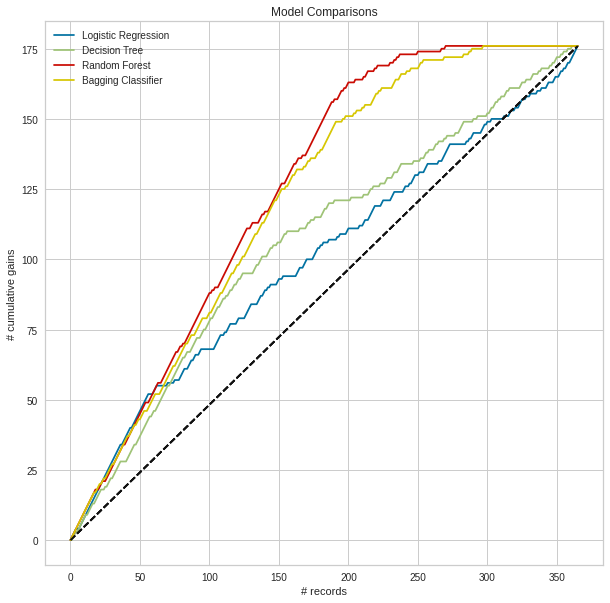

In [212]:
# Plot
ax = gainsChart(lr_result.actual, label='Logistic Regression', color='C0', figsize=[10, 10])
ax = gainsChart(dt_result.actual, label='Decision Tree', color='C1', ax=ax)
ax = gainsChart(rf_result.actual, label='Random Forest', color='C2', ax=ax)
ax = gainsChart(bc_result.actual, label='Bagging Classifier', color='C4', ax=ax)
ax.legend()
ax.set_title('Model Comparisons')

plt.show()

---
**Answer:**

Assuming our best segment 0 comes from our purchase behavior segmentation. I’ve built several models, Logistic regression, decision tree, random forest, and a bagging classifier, to see which one does the best job of predicting segment 0 our target segment. I found that Random Forest did the best job of predicting our segment with the highest accuracy of 0.8137 and the lowest overall AIC score of 456. You can visualize its superiority over the other models just viewing the gains chart we plotted above.



--- 
<br>

## Question 4
Briefly explain, in two to three paragraphs, the business objective, the data mining models used, why they were used, the model results, and your recommendations to your non-technical stakeholder team. (18 points)



---
**Answer:**


Our business objective was to find segments that are both profitable and responsive to promotions. We used Kmeans clustering to identify the segments. Then we used classification modeling to try to predict the segments from our customer data. With our best performing model, Random Forest, we are able to predict our most profitable customers who are most likely to respond to marketing promotions.

I recommend that we target prospects that most look like our best performing segments using the Ransom Forest model we created during this exercise.


--- 
<br>